In [1]:
from jgtpy import adshelper as ah


In [2]:
i="SPX500";t="H4"
data=ah.prepare_cds_for_ads_data(i,t,500)

In [3]:
from jgtpy import JGTADS as ads

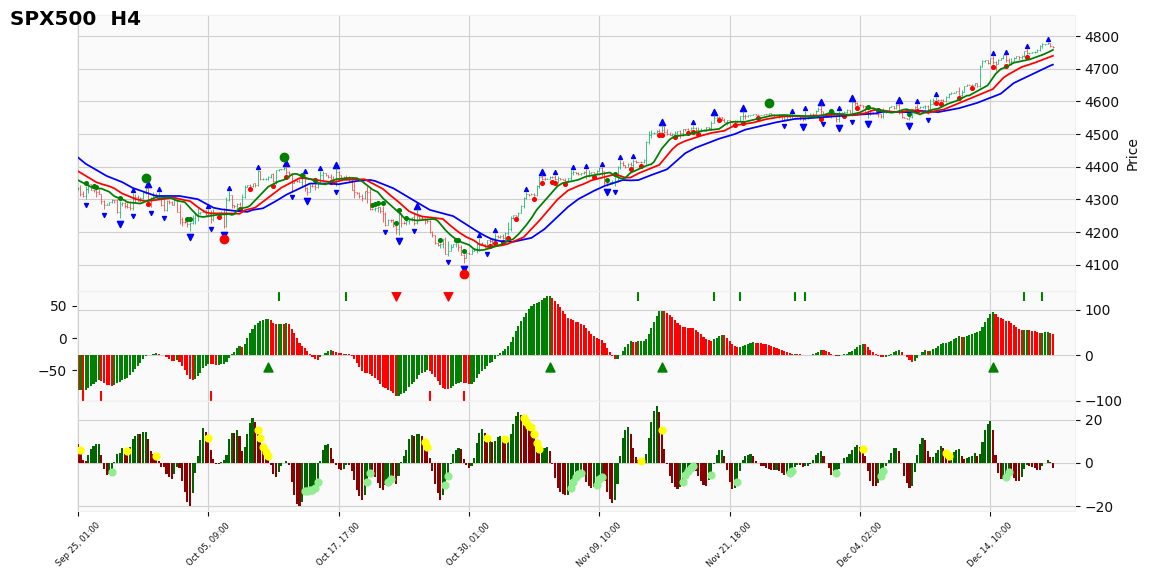

(<Figure size 1150x575 with 6 Axes>,
 [<Axes: ylabel='Price'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >])

In [4]:
ads.plot_from_cds_df(data,i,t)

In [5]:
import plotly.graph_objects as go
import plotly.subplots as sp


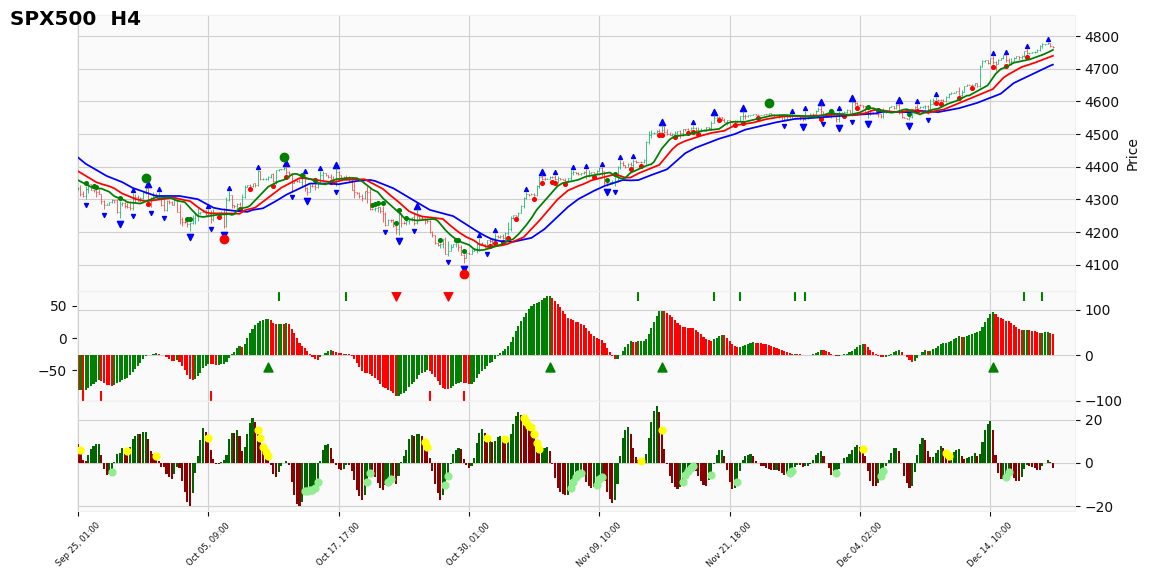

In [22]:
cfig,cx= ads.plot_from_cds_df(data,i,t,show=False)

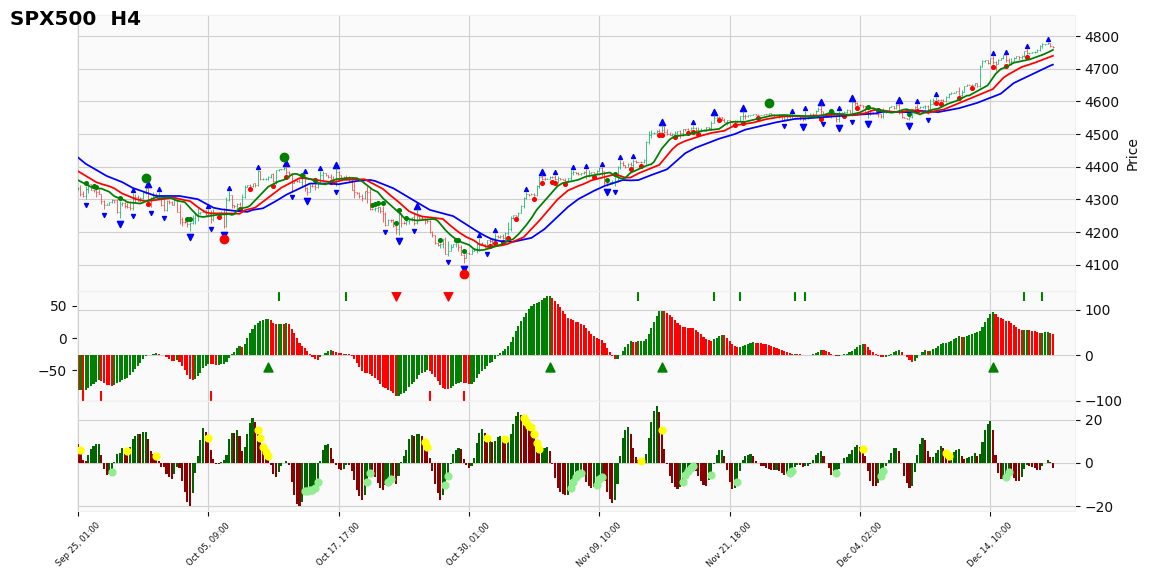

In [23]:
cfig.figure


In [24]:

def convert_mpf_plot_to_plotly_dash(fig, axes):
    """
    Converts an mplfinance plot to a plotly dash plot.

    Args:
        fig (matplotlib.figure.Figure): The mplfinance figure object.
        axes (matplotlib.axes.Axes): The mplfinance axes object.

    Returns:
        plotly.graph_objects.Figure: The plotly dash figure object.
    """

    # Get the data from the mplfinance plot
    #data = fig.data

    # Create a plotly dash figure
    fig = sp.make_subplots(rows=len(axes), cols=1, shared_xaxes=True, subplot_titles=axes.keys())

    # Add the data to the plotly dash figure
    for i, ax in enumerate(axes.values()):
        for j, line in enumerate(ax.lines):
            x_data = line.get_xdata()
            y_data = line.get_ydata()
            fig.add_trace(go.Scatter(x=x_data, y=y_data), row=i+1, col=1)

    # Update the layout of the plotly dash figure
    fig.update_layout(height=fig.canvas.get_window_height(), width=fig.canvas.get_window_width())

    return fig

In [25]:
axes_dict = dict(enumerate(cx))
pfig = convert_mpf_plot_to_plotly_dash(cfig, axes_dict)

TypeError: 'dict_keys' object is not subscriptable